# Challenge: Data Analysis
project description here

## Imports
Those are all the modules we need for this notebook to work correctly

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display_html 
from utils.display import display_side_by_side

## Import Dataset
Can't work on datas without importing them beforehand.

In [2]:
ds = pd.read_csv("houses.csv")

## 1. Data Cleaning
Before we can dive into the analysis, we need to clean the datas first.

Let's check if there are any duplicate values.

In [3]:
dupes = ds.drop(columns=["subtype"]).duplicated().to_frame().rename(columns={0: "is_dupe"})
dupes[dupes["is_dupe"]]

,is_dupe
155,True
178,True
263,True
274,True
405,True
...,...
18019,True
18067,True
18131,True
18135,True


That's quite the amount of duplicates... Let's get rid of them.

In [18]:
# Get the ID of all the duplicate rows
dupes_id = dupes[dupes["is_dupe"]].index.to_list()

# And filter the dupes out of the original datafram
# Also reset the index so everything is ordered again
ds_clean = ds.loc[~dupes.index.isin(dupes_id)].reset_index().drop(columns=["index"])

The **subtype** and **building_condition** columns are also not well formated, we'll replace undescores with spaces and Capitalize the values.

In [5]:
# First let's remove the undescores
ds_clean.subtype = ds_clean.subtype.str.replace("_", " ")
ds_clean.building_condition = ds_clean.building_condition.str.replace("_", " ")

# Then capitalize the types
ds_clean.subtype = ds_clean.subtype.str.capitalize()
ds_clean.building_condition = ds_clean.building_condition.str.capitalize()
ds_clean

,location,type,subtype,price,room_number,area,kitchen_equipped,furnished,fireplace,terrace,terrace_area,garden,garden_area,land_surface,facade_count,swimming_pool,building_condition
0,6800,HOUSE,House,295000.0,5,460.0,1,0,0,1,10.0,0,NaN,321.0,2.0,0,To be done up
1,7800,HOUSE,House,230000.0,4,128.0,0,0,0,0,NaN,0,NaN,570.0,4.0,0,NaN
2,8760,HOUSE,House,145000.0,6,NaN,0,0,0,0,NaN,1,NaN,233.0,NaN,0,To renovate
3,6044,HOUSE,House,130000.0,2,110.0,1,1,0,1,NaN,1,300.0,470.0,3.0,0,To be done up
4,4970,HOUSE,House,450000.0,9,400.0,1,0,0,0,NaN,1,1300.0,1500.0,4.0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17690,8300,HOUSE,House,1495000.0,4,NaN,0,0,0,1,NaN,1,NaN,813.0,NaN,0,NaN
17691,2140,HOUSE,House,435000.0,4,200.0,1,0,0,1,15.0,1,120.0,248.0,2.0,0,As new
17692,4367,HOUSE,Villa,375000.0,3,117.0,1,0,0,1,25.0,1,891.0,1002.0,4.0,0,Good
17693,8210,HOUSE,Villa,435000.0,4,282.0,1,0,1,1,NaN,1,NaN,989.0,NaN,0,NaN


Now let's replace **NaN** with 0 where we can

In [6]:
ds_clean["terrace_area"] = ds_clean["terrace_area"].fillna(0)
ds_clean["garden_area"] = ds_clean["garden_area"].fillna(0)
ds_clean["facade_count"] = ds_clean["facade_count"].fillna(0)
ds_clean["land_surface"] = ds_clean["land_surface"].fillna(0)

ds_clean

,location,type,subtype,price,room_number,area,kitchen_equipped,furnished,fireplace,terrace,terrace_area,garden,garden_area,land_surface,facade_count,swimming_pool,building_condition
0,6800,HOUSE,House,295000.0,5,460.0,1,0,0,1,10.0,0,0.0,321.0,2.0,0,To be done up
1,7800,HOUSE,House,230000.0,4,128.0,0,0,0,0,0.0,0,0.0,570.0,4.0,0,NaN
2,8760,HOUSE,House,145000.0,6,NaN,0,0,0,0,0.0,1,0.0,233.0,0.0,0,To renovate
3,6044,HOUSE,House,130000.0,2,110.0,1,1,0,1,0.0,1,300.0,470.0,3.0,0,To be done up
4,4970,HOUSE,House,450000.0,9,400.0,1,0,0,0,0.0,1,1300.0,1500.0,4.0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17690,8300,HOUSE,House,1495000.0,4,NaN,0,0,0,1,0.0,1,0.0,813.0,0.0,0,NaN
17691,2140,HOUSE,House,435000.0,4,200.0,1,0,0,1,15.0,1,120.0,248.0,2.0,0,As new
17692,4367,HOUSE,Villa,375000.0,3,117.0,1,0,0,1,25.0,1,891.0,1002.0,4.0,0,Good
17693,8210,HOUSE,Villa,435000.0,4,282.0,1,0,1,1,0.0,1,0.0,989.0,0.0,0,NaN


Let's also remove entries where the price is NaN

In [7]:
ds_clean = ds_clean.loc[~ds_clean.price.isnull()]
ds.loc[ds.price.isnull()]

,location,type,subtype,price,room_number,area,kitchen_equipped,furnished,fireplace,terrace,terrace_area,garden,garden_area,land_surface,facade_count,swimming_pool,building_condition
647,1600,HOUSE,HOUSE,NaN,5,244.0,1,0,0,0,NaN,1,73.0,153.0,2.0,0,TO_RENOVATE
983,3220,HOUSE,HOUSE,NaN,3,NaN,0,0,0,0,NaN,0,NaN,389.0,3.0,0,NaN
3300,4880,HOUSE,FARMHOUSE,NaN,2,NaN,0,0,0,0,NaN,1,NaN,1864.0,4.0,0,TO_RESTORE
7177,9600,HOUSE,HOUSE,NaN,1,NaN,0,0,0,0,NaN,0,NaN,278.0,2.0,0,TO_RENOVATE


## 2. Data Analysis
Now that we've cleaned the Dataset, we can finally analyze it !

### Which variable is the target ?
The "**price**" column.

### How many rows and columns ?

In [8]:
rows, columns = ds_clean.shape
print(f"Rows: {rows}\nColumns: {columns}")

Rows: 17691
Columns: 17


### What is the correlation between the variables and the target ?
For the correlation I'll be dropping the **subtype** and **location** columns, due to how much variance there's in the amount of certain subtypes/locations.

In [9]:
ds_corr = ds_clean.copy().drop(columns=["location", "subtype"])

# Label Encode Categorical variables
# 0 = Apartment, 1 = House
ds_corr['type'] = ds_corr['type'].astype('category').cat.codes

price_corr = ds_corr.corrwith(ds_corr['price']).to_frame().rename(columns={0: "price_corr"}).drop(["price"])
price_corr

,price_corr
type,0.100091
room_number,0.243998
area,0.592465
kitchen_equipped,0.034855
furnished,0.010121
fireplace,0.140280
terrace,0.122145
terrace_area,0.172160
garden,0.060194
garden_area,0.055270


### What is the correlation between the variables and the other variables ?

In [10]:
ds_corr.corr()

,type,price,room_number,area,kitchen_equipped,furnished,fireplace,terrace,terrace_area,garden,garden_area,land_surface,facade_count,swimming_pool
type,1.000000,0.100091,0.276047,0.411325,-0.028532,-0.084329,0.139995,-0.142359,0.001974,0.372004,0.024465,0.071742,0.322935,0.097617
price,0.100091,1.000000,0.243998,0.592465,0.034855,0.010121,0.140280,0.122145,0.172160,0.060194,0.055270,0.201008,0.154333,0.316096
room_number,0.276047,0.243998,1.000000,0.384508,-0.006669,-0.037448,0.079738,-0.001059,0.103297,0.119862,0.036222,0.083954,0.142815,0.090648
area,0.411325,0.592465,0.384508,1.000000,-0.007930,-0.045414,0.172825,-0.001309,0.163530,0.163703,0.076294,0.207696,0.222856,0.263491
kitchen_equipped,-0.028532,0.034855,-0.006669,-0.007930,1.000000,0.002819,0.057071,0.169721,0.069969,0.068533,0.008562,0.005049,0.130351,0.044071
furnished,-0.084329,0.010121,-0.037448,-0.045414,0.002819,1.000000,-0.009746,-0.002813,-0.014765,-0.029702,-0.004473,-0.006084,-0.021678,-0.001821
fireplace,0.139995,0.140280,0.079738,0.172825,0.057071,-0.009746,1.000000,0.017365,0.058240,0.127756,0.008169,0.035551,0.163407,0.110068
terrace,-0.142359,0.122145,-0.001059,-0.001309,0.169721,-0.002813,0.017365,1.000000,0.232187,0.060290,0.015148,0.005996,0.041816,0.070148
terrace_area,0.001974,0.172160,0.103297,0.163530,0.069969,-0.014765,0.058240,0.232187,1.000000,0.093006,0.024996,0.028267,0.094029,0.114824
garden,0.372004,0.060194,0.119862,0.163703,0.068533,-0.029702,0.127756,0.060290,0.093006,1.000000,0.048625,0.019049,0.128054,0.065683


### Which variables have the greatest influence on the target ?

In [11]:
price_corr.sort_values(by='price_corr', key=abs, ascending=False).head(5)

,price_corr
area,0.592465
swimming_pool,0.316096
room_number,0.243998
land_surface,0.201008
terrace_area,0.172160


### Which variables have the least influence on the target ?

In [12]:
price_corr.sort_values(by='price_corr', key=abs).head(5)

,price_corr
furnished,0.010121
kitchen_equipped,0.034855
garden_area,0.055270
garden,0.060194
type,0.100091


### Compare the correlations between different building types
Let's now try to separate the building by types and run the correlation function on each one.

In [13]:
houses = ds_corr.loc[ds_corr.type == 1]
houses_corr = houses.corrwith(houses['price']).to_frame().rename(columns={0: "price_corr"}).drop(["price", "type"]).sort_values(by='price_corr', key=abs, ascending=False)

aparts = ds_corr.loc[ds_corr.type == 0]
aparts_corr = aparts.corrwith(aparts['price']).to_frame().rename(columns={0: "price_corr"}).drop(["price", "type"]).sort_values(by='price_corr', key=abs, ascending=False)

display_side_by_side(houses_corr, aparts_corr, titles=["Houses", "Apartments"])

,price_corr
area,0.626248
swimming_pool,0.377595
room_number,0.375496
land_surface,0.229080
facade_count,0.163722
terrace,0.148489
terrace_area,0.138775
fireplace,0.138507
garden_area,0.062629
kitchen_equipped,0.057252


### Percentage of missing values per column ?

In [14]:
ds_clean.isnull().mean() * 100

location               0.000000
type                   0.000000
subtype                0.000000
price                  0.000000
room_number            0.000000
area                  10.276412
kitchen_equipped       0.000000
furnished              0.000000
fireplace              0.000000
terrace                0.000000
terrace_area           0.000000
garden                 0.000000
garden_area            0.000000
land_surface           0.000000
facade_count           0.000000
swimming_pool          0.000000
building_condition    23.475213
dtype: float64

## 3. Data interpretation
Big Tidy Graphs.

### Are there any outliers ? If yes, which ones and why ?
Let's check the highest and the lowest prices.

In [15]:
ds_clean.sort_values(by='price', ascending=False).head(10)

,location,type,subtype,price,room_number,area,kitchen_equipped,furnished,fireplace,terrace,terrace_area,garden,garden_area,land_surface,facade_count,swimming_pool,building_condition
13162,8400,HOUSE,Exceptional property,9999999.0,0,450.0,0,0,1,1,100.0,1,1.0,720.0,5.0,0,As new
7994,3090,HOUSE,Castle,9500000.0,12,1100.0,1,0,0,1,0.0,0,0.0,500000.0,4.0,1,As new
14074,8300,HOUSE,House,9500000.0,7,945.0,0,0,0,1,0.0,0,0.0,2348.0,4.0,1,As new
15034,8300,HOUSE,Exceptional property,9500000.0,7,945.0,1,1,0,1,0.0,1,2348.0,2348.0,4.0,1,As new
7572,3090,HOUSE,Castle,9500000.0,7,1100.0,1,0,0,0,0.0,0,0.0,500000.0,4.0,1,Good
11463,1060,HOUSE,Apartment block,7300000.0,0,1950.0,0,0,1,0,0.0,0,0.0,0.0,2.0,0,Good
2861,8300,HOUSE,Villa,6900000.0,7,463.0,0,0,0,1,0.0,0,0.0,1083.0,4.0,0,As new
3249,1380,HOUSE,Exceptional property,6500000.0,9,1750.0,1,0,0,1,500.0,1,80978.0,80798.0,4.0,1,Just renovated
14002,1150,HOUSE,Exceptional property,5950000.0,6,751.0,1,0,0,1,30.0,1,2500.0,3000.0,4.0,0,As new
3019,1150,HOUSE,House,5950000.0,6,750.0,1,0,1,0,0.0,0,0.0,0.0,4.0,1,Just renovated


There doesn't seem to be anything wrong about those properties, they're luxurious goods but are still valid estates.

Let's now take a look at the cheapest goods.

In [16]:
ds_clean.sort_values(by='price', ascending=True).head(10)

,location,type,subtype,price,room_number,area,kitchen_equipped,furnished,fireplace,terrace,terrace_area,garden,garden_area,land_surface,facade_count,swimming_pool,building_condition
13700,4690,HOUSE,House,1000.0,3,NaN,1,0,0,0,0.0,0,0.0,207.0,2.0,0,NaN
2008,6870,HOUSE,House,5000.0,2,121.0,0,0,0,0,0.0,0,0.0,285.0,2.0,0,To restore
7077,8560,HOUSE,House,10000.0,1,NaN,0,0,0,0,0.0,0,0.0,573.0,2.0,0,To renovate
9478,4101,HOUSE,House,10000.0,2,100.0,0,0,0,0,0.0,1,0.0,315.0,3.0,0,To renovate
12617,4040,HOUSE,House,15000.0,2,NaN,0,0,0,0,0.0,0,0.0,0.0,0.0,0,NaN
9427,6200,HOUSE,House,15000.0,2,70.0,0,0,0,0,0.0,0,0.0,145.0,2.0,0,To renovate
3992,9320,APARTMENT,Apartment,15000.0,2,7.0,1,0,0,0,0.0,0,0.0,0.0,0.0,0,As new
14409,1400,APARTMENT,Apartment,17500.0,2,80.0,1,0,0,1,7.0,0,0.0,0.0,4.0,0,As new
9762,4920,HOUSE,House,25000.0,4,150.0,1,0,0,0,0.0,0,0.0,105.0,2.0,0,NaN
3029,7340,HOUSE,House,25000.0,6,NaN,0,0,0,0,0.0,0,0.0,260.0,2.0,0,To restore


Those are pretty low values for houses... If we look for them on Immoweb, we notice that those are reserve prices, in short, the absolute minimum price at which the good will be sold. So those prices might not reflect the real values of said good.

I personally think they should be purged due to not reflecting the real market value of the houses, but for the sake of presentation they will be kept.

### Which variables would you remove and why ?
None, I think they can all be useful for getting some kind of understanding on how they affect the final price of the building.

### In your opinion, which 5 variables are the most important and why?

- **Type**: Useful for understanding how features affect the price of different types of buildings
- **Area**: Has a direct impact on the price
- **Room number**: Also affects the price directly
- **Terrace**/**Terrace Area**: Shows a correlation w/ price
- **Garden**/**Garden Area**: Shows a correlation w/ price

## 4. Miscellaneous Analysis

### Does having a Garden increases the price of a house ?

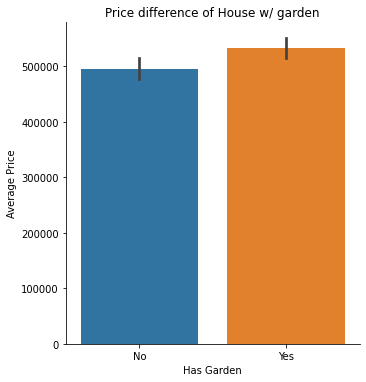

In [92]:
garden_plot = sns.catplot(x="garden", y="price", kind="bar", data=houses)
garden_plot.set_axis_labels("Has Garden", "Average Price")
garden_plot.set(xticklabels = ["No", "Yes"], title="Price difference of House w/ garden")
display(garden_plot)

### What's the average price increase of a House w/ a swimming pool ?

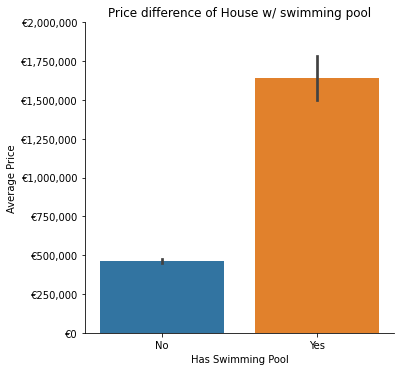

In [90]:
pool_plot = sns.catplot(x="swimming_pool", y="price", kind="bar", data=houses)
pool_plot.set_axis_labels("Has Swimming Pool", "Average Price")
pool_plot.set(
    title="Price difference of House w/ swimming pool",
    xticklabels = ["No", "Yes"],
    )
plt.ticklabel_format(style='plain', axis='y')
yticks = pool_plot.axes[0][0].get_yticks()

ylabels = [f'€{y:,.0f}' for y in yticks]
pool_plot.set_yticklabels(ylabels)